In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *

In [39]:
keys = ['roc_auc', 'pr_auc']

In [40]:
def filter_results(df, pattern) :
    return df.filter(regex=pattern, axis=0)

In [42]:
def get_results(data_name) :
    yr_df = []
    for model in ['baselines', 'Basic', 'Attention', 'Structured Attention', 'Hierarchical Attention'] :
        name = os.path.join('outputs/', data_name, model)
        if os.path.exists(name) :
            dirs = os.listdir(name)
            dfs = {}
            for d in sorted(dirs) :
                dirname = os.path.join(name, d)
                if os.path.isdir(dirname) :
                    model_name = get_latest_model(dirname)
                    if model_name is not None :
                        df = json.load(open(os.path.join(model_name, 'evaluate.json')))
                        dfs[d] = {k:v for k, v in df.items()}

            dfs = pd.DataFrame(dfs).transpose()
            yr_df += [dfs]

    yr_df = pd.concat(yr_df, axis=0).round(3)
    return yr_df

In [47]:
import seaborn as sns
def generate_lr_graphs(lr_results) :
    lr_results['model_type'] = [x.split('+')[1] for x in lr_results.index]
    lr_results['norm'] = [x.split('+')[2].split('=')[1] if len(x.split('+')) > 2 else None for x in lr_results.index]
    lr_results['Structured'] = [True if len(x.split('+')) > 3 else False for x in lr_results.index]
    lr_results = lr_results[lr_results['model_type'] != 'Structured']
    sns.pointplot(x='model_type', y='roc_auc', hue='norm', data=lr_results[lr_results['Structured'] == True])
#     plt.show()
    sns.pointplot(x='model_type', y='roc_auc', hue='norm', data=lr_results[lr_results['Structured'] == False])
    plt.show()

/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jainsarthak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

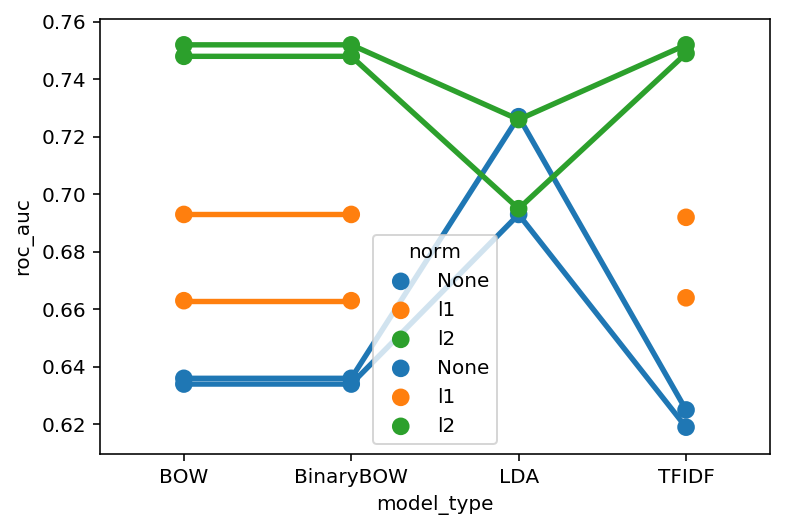

In [48]:
df_readmission = get_results('Readmission')
generate_lr_graphs(filter_results(df_readmission, 'LR+'))